In [1]:
# Import required libraries
import json
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from pathlib import Path

# Set up the frames directory path
frames_dir = "../frames"

In [2]:
# Function to discover available game sessions
def get_game_sessions():
    """Get all available game sessions with their frame counts."""
    sessions = {}
    if os.path.exists(frames_dir):
        for game_folder in os.listdir(frames_dir):
            game_path = os.path.join(frames_dir, game_folder)
            if os.path.isdir(game_path):
                frame_files = [f for f in os.listdir(game_path) if f.endswith('.json')]
                sessions[game_folder] = len(frame_files)
    return sessions

# Discover available sessions
sessions = get_game_sessions()
print("Available game sessions:")
for game_id, frame_count in sessions.items():
    print(f"  {game_id}: {frame_count} frames")

Available game sessions:
  ls20-fa137e247ce6: 82 frames


In [3]:
# Function to load and analyze a specific game session
def load_game_session(game_id):
    """Load all frames from a game session."""
    game_path = os.path.join(frames_dir, game_id)
    if not os.path.exists(game_path):
        print(f"Game session {game_id} not found!")
        return None
    
    frame_files = sorted([f for f in os.listdir(game_path) if f.endswith('.json')])
    frames = []
    
    for frame_file in frame_files:
        try:
            with open(os.path.join(game_path, frame_file), 'r') as f:
                frame_data = json.load(f)
                frames.append(frame_data)
        except Exception as e:
            print(f"Error loading {frame_file}: {e}")
    
    return frames

# Select the first available game session for analysis
if sessions:
    selected_game = list(sessions.keys())[0]
    print(f"Loading game session: {selected_game}")
    frames = load_game_session(selected_game)
    print(f"Loaded {len(frames)} frames")
else:
    print("No game sessions found!")

Loading game session: ls20-fa137e247ce6
Loaded 82 frames


In [4]:
# Analyze frame structure and metadata
if 'frames' in locals() and frames:
    print("=== FRAME STRUCTURE ANALYSIS ===")
    sample_frame = frames[0]
    
    print(f"Frame keys: {list(sample_frame.keys())}")
    
    # Let's explore the actual structure
    print("\n=== EXPLORING FRAME STRUCTURE ===")
    for key in sample_frame.keys():
        print(f"\n{key}:")
        if isinstance(sample_frame[key], dict):
            print(f"  Type: dict")
            print(f"  Keys: {list(sample_frame[key].keys())}")
            # Show first few items if it's a small dict
            if len(sample_frame[key]) <= 10:
                for subkey, subvalue in sample_frame[key].items():
                    print(f"    {subkey}: {type(subvalue)} - {subvalue if len(str(subvalue)) < 100 else str(subvalue)[:100] + '...'}")
        elif isinstance(sample_frame[key], list):
            print(f"  Type: list")
            print(f"  Length: {len(sample_frame[key])}")
            if sample_frame[key]:
                print(f"  First item type: {type(sample_frame[key][0])}")
                if isinstance(sample_frame[key][0], list):
                    # Might be a 2D array (frame data)
                    print(f"  Dimensions: {len(sample_frame[key])}x{len(sample_frame[key][0]) if sample_frame[key] else 0}")
                    if sample_frame[key]:
                        frame_array = np.array(sample_frame[key])
                        print(f"  Array shape: {frame_array.shape}")
                        print(f"  Data range: [{frame_array.min()}, {frame_array.max()}]")
                        print(f"  Unique values: {np.unique(frame_array)}")
        else:
            print(f"  Type: {type(sample_frame[key])}")
            print(f"  Value: {sample_frame[key] if len(str(sample_frame[key])) < 200 else str(sample_frame[key])[:200] + '...'}")

=== FRAME STRUCTURE ANALYSIS ===
Frame keys: ['game_session', 'game_metrics', 'action_analysis']

=== EXPLORING FRAME STRUCTURE ===

game_session:
  Type: dict
  Keys: ['game_id', 'total_frames', 'session_duration_seconds', 'average_fps', 'start_time', 'end_time']
    game_id: <class 'str'> - ls20-fa137e247ce6
    total_frames: <class 'int'> - 81
    session_duration_seconds: <class 'float'> - 42.563
    average_fps: <class 'float'> - 1.903061344360125
    start_time: <class 'str'> - 2025-11-04 12:22:49.704000
    end_time: <class 'str'> - 2025-11-04 12:23:32.267000

game_metrics:
  Type: dict
  Keys: ['states_encountered', 'final_score', 'max_score', 'score_variance', 'frames_with_visual_data']
    states_encountered: <class 'list'> - ['NOT_FINISHED']
    final_score: <class 'str'> - 0
    max_score: <class 'str'> - 0
    score_variance: <class 'float'> - 0.0
    frames_with_visual_data: <class 'str'> - 81

action_analysis:
  Type: dict
  Keys: ['total_unique_action_sets', 'avg_action

In [5]:
# The loaded data appears to be a summary file, not individual frames
# Let's look for the actual frame files that contain visual data
def load_individual_frames(game_id):
    """Load individual frame files that contain the actual visual data."""
    game_path = os.path.join(frames_dir, game_id)
    if not os.path.exists(game_path):
        print(f"Game session {game_id} not found!")
        return None
    
    # Look for frame files (exclude analysis_summary.json)
    frame_files = sorted([f for f in os.listdir(game_path) 
                         if f.endswith('.json') and f.startswith('frame_')])
    
    print(f"Found {len(frame_files)} individual frame files:")
    print(f"First few: {frame_files[:5]}")
    print(f"Last few: {frame_files[-5:]}")
    
    frames = []
    for i, frame_file in enumerate(frame_files):
        try:
            with open(os.path.join(game_path, frame_file), 'r') as f:
                frame_data = json.load(f)
                frames.append(frame_data)
            
            # Show structure of first frame
            if i == 0:
                print(f"\n=== INDIVIDUAL FRAME STRUCTURE ===")
                print(f"Keys in {frame_file}: {list(frame_data.keys())}")
                
        except Exception as e:
            print(f"Error loading {frame_file}: {e}")
    
    return frames

# Load the actual individual frames
if sessions:
    selected_game = list(sessions.keys())[0]
    print(f"Loading individual frames for game session: {selected_game}")
    individual_frames = load_individual_frames(selected_game)
    
    if individual_frames:
        print(f"Successfully loaded {len(individual_frames)} individual frames")
        # Update the frames variable to point to individual frames
        frames = individual_frames
    else:
        print("No individual frame data found!")
else:
    print("No game sessions found!")

Loading individual frames for game session: ls20-fa137e247ce6
Found 81 individual frame files:
First few: ['frame_0001_1762239169704.json', 'frame_0002_1762239170041.json', 'frame_0003_1762239170656.json', 'frame_0004_1762239170979.json', 'frame_0005_1762239171619.json']
Last few: ['frame_0077_1762239209809.json', 'frame_0078_1762239210142.json', 'frame_0079_1762239210828.json', 'frame_0080_1762239211553.json', 'frame_0081_1762239212267.json']

=== INDIVIDUAL FRAME STRUCTURE ===
Keys in frame_0001_1762239169704.json: ['frame_number', 'timestamp', 'game_id', 'frame', 'state', 'score', 'guid', 'full_reset', 'available_actions']
Successfully loaded 81 individual frames


In [6]:
# Now let's examine the structure of the actual frame data
if individual_frames:
    print("=== INDIVIDUAL FRAME DATA ANALYSIS ===")
    sample_frame = individual_frames[0]
    
    print(f"Frame keys: {list(sample_frame.keys())}")
    print(f"Game ID: {sample_frame.get('game_id', 'N/A')}")
    print(f"Frame number: {sample_frame.get('frame_number', 'N/A')}")
    print(f"State: {sample_frame.get('state', 'N/A')}")
    print(f"Score: {sample_frame.get('score', 'N/A')}")
    print(f"Available actions: {sample_frame.get('available_actions', 'N/A')}")
    
    # Check the frame data structure
    frame_data = sample_frame.get('frame')
    if frame_data:
        if isinstance(frame_data, list):
            print(f"Frame data type: list")
            print(f"Frame dimensions: {len(frame_data)}x{len(frame_data[0]) if frame_data else 0}")
            
            # Convert to numpy array and analyze
            frame_array = np.array(frame_data)
            print(f"Frame array shape: {frame_array.shape}")
            print(f"Frame data range: [{frame_array.min()}, {frame_array.max()}]")
            print(f"Unique values in frame: {sorted(np.unique(frame_array))}")
            
            # Check if it's actually visual data by looking at the pattern
            if frame_array.size > 0:
                print(f"Sample of frame data (first 3x3):")
                print(frame_array[:min(3, frame_array.shape[0]), :min(3, frame_array.shape[1])])
        else:
            print(f"Frame data type: {type(frame_data)}")
            print(f"Frame data: {frame_data}")
    else:
        print("No frame data found!")
    
    # Check a few more frames to see if they have visual data
    print(f"\n=== CHECKING MULTIPLE FRAMES ===")
    frames_with_data = 0
    for i, frame in enumerate(individual_frames[:10]):  # Check first 10 frames
        if frame.get('frame'):
            frames_with_data += 1
            if i < 3:  # Show details for first 3
                frame_array = np.array(frame['frame'])
                print(f"Frame {i+1}: shape={frame_array.shape}, values={sorted(np.unique(frame_array))}")
    
    print(f"Frames with visual data (out of first 10): {frames_with_data}")

=== INDIVIDUAL FRAME DATA ANALYSIS ===
Frame keys: ['frame_number', 'timestamp', 'game_id', 'frame', 'state', 'score', 'guid', 'full_reset', 'available_actions']
Game ID: ls20-fa137e247ce6
Frame number: 1
State: NOT_FINISHED
Score: 0
Available actions: [1, 2, 3, 4]
Frame data type: list
Frame dimensions: 1x64
Frame array shape: (1, 64, 64)
Frame data range: [0, 15]
Unique values in frame: [np.int64(0), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(9), np.int64(12), np.int64(15)]
Sample of frame data (first 3x3):
[[[ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
    4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
    4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4]
  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
    4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
    4  4  4  4  4  4  8  8  4  4  8  8  4  4  8  8  4  4]
  [ 4  4 15  4 15  4 15  4 15  4 15  4 15  4 15  4 15  4 15  4 

In [7]:
# Visualization functions for frame data
def visualize_frame(frame_data, title="Frame", figsize=(8, 8), colormap='tab20'):
    """
    Visualize a single frame as a grid.
    
    Args:
        frame_data: 2D or 3D array representing the frame
        title: Title for the plot
        figsize: Figure size tuple
        colormap: Matplotlib colormap to use
    """
    if frame_data is None:
        print("No frame data to visualize")
        return
    
    frame_array = np.array(frame_data)
    
    # Handle different array shapes
    original_shape = frame_array.shape
    
    # If it's 3D with shape (1, H, W), squeeze out the first dimension
    if len(frame_array.shape) == 3:
        if frame_array.shape[0] == 1:
            frame_array = frame_array.squeeze(0)  # Remove first dimension
        else:
            print(f"Unexpected 3D shape: {original_shape}. Using first slice.")
            frame_array = frame_array[0]
    
    # Ensure we have a 2D array
    if len(frame_array.shape) != 2:
        print(f"Cannot visualize frame with shape: {original_shape}")
        return
    
    print(f"Visualizing frame: original shape {original_shape} -> display shape {frame_array.shape}")
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the grid visualization
    im = ax.imshow(frame_array, cmap=colormap, vmin=0, vmax=15, interpolation='nearest')
    
    # Add grid lines for smaller grids
    if frame_array.shape[0] <= 32 and frame_array.shape[1] <= 32:
        ax.set_xticks(np.arange(-0.5, frame_array.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, frame_array.shape[0], 1), minor=True)
        ax.grid(which="minor", color="white", linestyle='-', linewidth=0.5, alpha=0.7)
    
    # Add value annotations for very small grids (up to 16x16)
    if frame_array.shape[0] <= 16 and frame_array.shape[1] <= 16:
        for i in range(frame_array.shape[0]):
            for j in range(frame_array.shape[1]):
                text = ax.text(j, i, frame_array[i, j],
                              ha="center", va="center", color="black", fontweight="bold", fontsize=8)
    
    ax.set_title(f"{title} - Shape: {frame_array.shape}")
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Cell Value')
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

def visualize_frame_sequence(frames, max_frames=10, cols=5):
    """
    Visualize a sequence of frames in a grid layout.
    
    Args:
        frames: List of frame dictionaries
        max_frames: Maximum number of frames to display
        cols: Number of columns in the grid
    """
    if not frames:
        print("No frames to visualize")
        return
    
    # Limit the number of frames
    frames_to_show = min(len(frames), max_frames)
    rows = (frames_to_show + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    
    # Handle different subplot configurations
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i in range(frames_to_show):
        row = i // cols
        col = i % cols
        
        if rows == 1 and cols == 1:
            ax = axes[0]
        elif rows == 1:
            ax = axes[0, col]
        elif cols == 1:
            ax = axes[row, 0]
        else:
            ax = axes[row, col]
        
        frame_data = frames[i].get('frame')
        if frame_data is not None:
            frame_array = np.array(frame_data)
            # Handle 3D arrays by squeezing first dimension if it's 1
            if len(frame_array.shape) == 3 and frame_array.shape[0] == 1:
                frame_array = frame_array.squeeze(0)
            
            im = ax.imshow(frame_array, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
            ax.set_title(f"Frame {frames[i].get('frame_number', i+1)}\nScore: {frames[i].get('score', 'N/A')}", fontsize=10)
        else:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"Frame {i+1} - No Data", fontsize=10)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Hide unused subplots
    for i in range(frames_to_show, rows * cols):
        row = i // cols
        col = i % cols
        
        if rows == 1 and cols == 1:
            continue
        elif rows == 1:
            ax = axes[0, col]
        elif cols == 1:
            ax = axes[row, 0]
        else:
            ax = axes[row, col]
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig, axes

=== FRAME VISUALIZATION ===
Visualizing first frame from game: ls20-fa137e247ce6
Frame number: 1, State: NOT_FINISHED
Visualizing frame: original shape (1, 64, 64) -> display shape (64, 64)


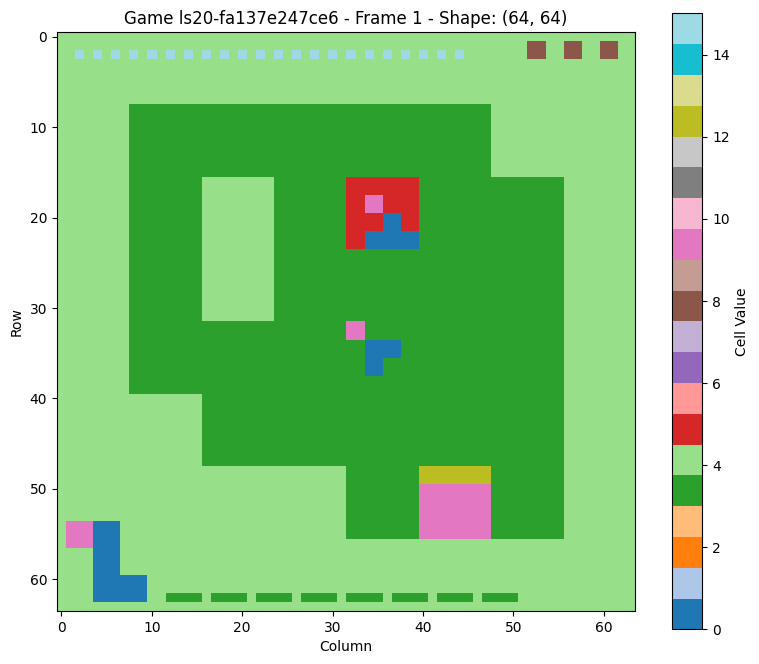


Frame statistics:
  Dimensions: (64, 64)
  Unique values: [np.int64(0), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(9), np.int64(12), np.int64(15)]
  Value counts:
    Value 0: 64 cells (1.6%)
    Value 3: 1744 cells (42.6%)
    Value 4: 2129 cells (52.0%)
    Value 5: 44 cells (1.1%)
    Value 8: 12 cells (0.3%)
    Value 9: 65 cells (1.6%)
    Value 12: 16 cells (0.4%)
    Value 15: 22 cells (0.5%)


In [8]:
# Visualize the first frame from the loaded game session
if 'individual_frames' in locals() and individual_frames:
    print("=== FRAME VISUALIZATION ===")
    
    # Show the first frame
    first_frame = individual_frames[0]
    print(f"Visualizing first frame from game: {first_frame['game_id']}")
    print(f"Frame number: {first_frame['frame_number']}, State: {first_frame['state']}")
    
    visualize_frame(first_frame['frame'], title=f"Game {first_frame['game_id']} - Frame {first_frame['frame_number']}")
    
    # Show basic statistics about the frame
    if first_frame['frame']:
        frame_array = np.array(first_frame['frame'])
        # Handle 3D array
        if len(frame_array.shape) == 3 and frame_array.shape[0] == 1:
            frame_array = frame_array[0]
        
        unique_values = np.unique(frame_array)
        print(f"\nFrame statistics:")
        print(f"  Dimensions: {frame_array.shape}")
        print(f"  Unique values: {sorted(unique_values)}")
        print(f"  Value counts:")
        for val in sorted(unique_values):
            count = np.sum(frame_array == val)
            percentage = (count / frame_array.size) * 100
            print(f"    Value {val}: {count} cells ({percentage:.1f}%)")
else:
    print("No individual frames loaded. Please run the frame loading cell first.")

=== FRAME SEQUENCE VISUALIZATION ===
Showing first 12 frames of the game sequence:


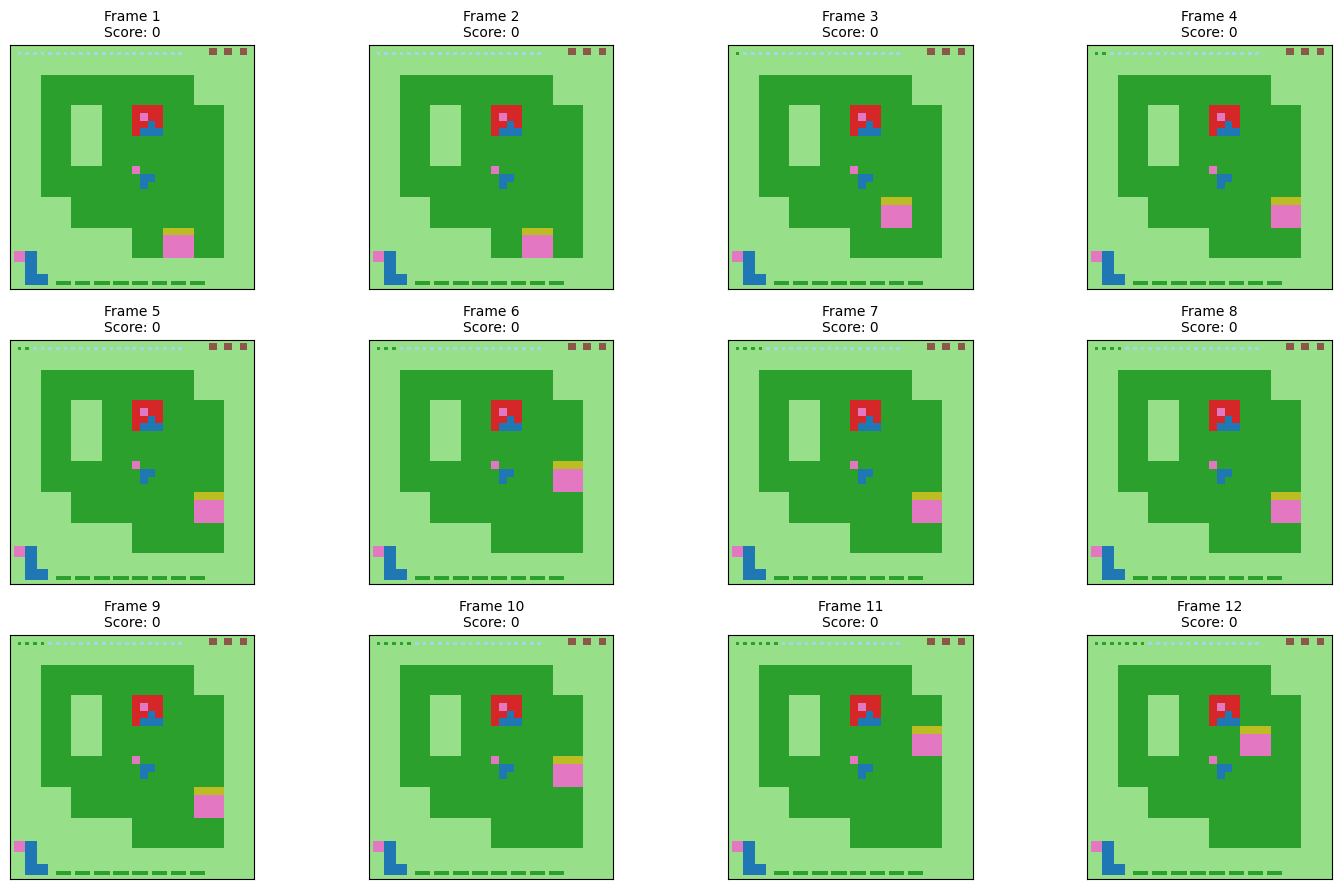


Game progression:
  Frame 1: Score = 0, State = NOT_FINISHED
  Frame 2: Score = 0, State = NOT_FINISHED
  Frame 3: Score = 0, State = NOT_FINISHED
  Frame 4: Score = 0, State = NOT_FINISHED
  Frame 5: Score = 0, State = NOT_FINISHED
  Frame 6: Score = 0, State = NOT_FINISHED
  Frame 7: Score = 0, State = NOT_FINISHED
  Frame 8: Score = 0, State = NOT_FINISHED
  Frame 9: Score = 0, State = NOT_FINISHED
  Frame 10: Score = 0, State = NOT_FINISHED
  Frame 11: Score = 0, State = NOT_FINISHED
  Frame 12: Score = 0, State = NOT_FINISHED


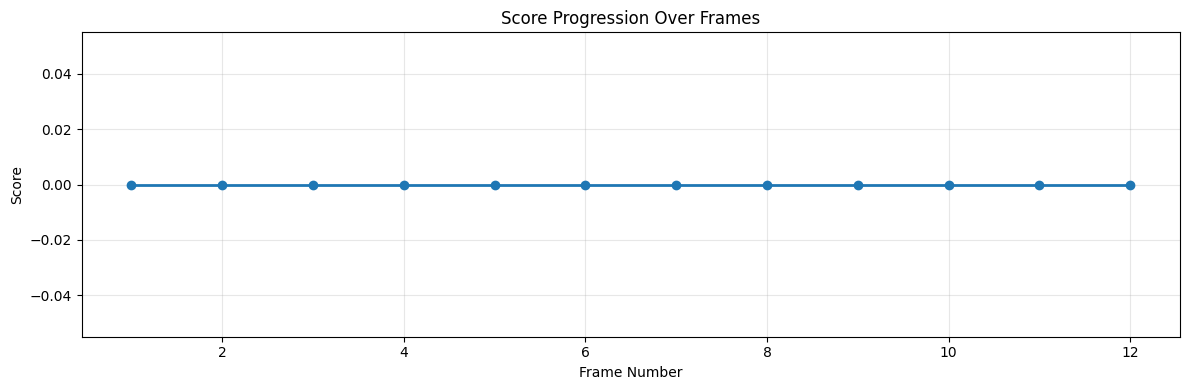

In [9]:
# Visualize a sequence of frames to see how the game evolves
if 'individual_frames' in locals() and individual_frames and len(individual_frames) > 1:
    print("=== FRAME SEQUENCE VISUALIZATION ===")
    
    # Show the first few frames to see the progression
    num_frames_to_show = min(12, len(individual_frames))
    print(f"Showing first {num_frames_to_show} frames of the game sequence:")
    
    visualize_frame_sequence(individual_frames[:num_frames_to_show], max_frames=num_frames_to_show, cols=4)
    
    # Show score progression
    scores = [frame.get('score', 0) for frame in individual_frames[:num_frames_to_show]]
    states = [frame.get('state', 'unknown') for frame in individual_frames[:num_frames_to_show]]
    frame_numbers = [frame.get('frame_number', i+1) for i, frame in enumerate(individual_frames[:num_frames_to_show])]
    
    print(f"\nGame progression:")
    for i, (frame_num, score, state) in enumerate(zip(frame_numbers, scores, states)):
        print(f"  Frame {frame_num}: Score = {score}, State = {state}")
    
    # Plot score over time
    plt.figure(figsize=(12, 4))
    plt.plot(frame_numbers, scores, marker='o', linewidth=2, markersize=6)
    plt.title('Score Progression Over Frames')
    plt.xlabel('Frame Number')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No individual frames loaded or insufficient frames for sequence visualization.")

=== FRAME COMPARISON ===
Comparing first and last frames (of 81 total frames):


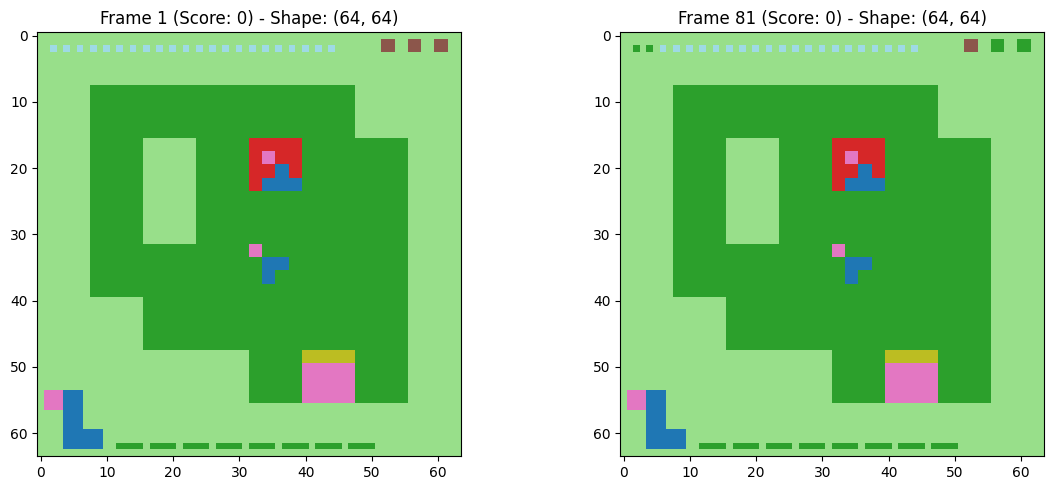

Differences: 10 out of 4096 cells (0.2%)
Changed positions (first 10): [(np.int64(1), np.int64(56)), (np.int64(1), np.int64(57)), (np.int64(1), np.int64(60)), (np.int64(1), np.int64(61)), (np.int64(2), np.int64(2)), (np.int64(2), np.int64(4)), (np.int64(2), np.int64(56)), (np.int64(2), np.int64(57)), (np.int64(2), np.int64(60)), (np.int64(2), np.int64(61))]


In [10]:
# Interactive frame explorer - select specific frames or compare frames
def compare_frames(frame1_data, frame2_data, titles=("Frame A", "Frame B")):
    """Compare two frames side by side."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Frame 1
    if frame1_data is not None:
        arr1 = np.array(frame1_data)
        # Handle 3D arrays by taking the first slice
        if len(arr1.shape) == 3 and arr1.shape[0] == 1:
            arr1 = arr1[0]
        im1 = ax1.imshow(arr1, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
        ax1.set_title(f"{titles[0]} - Shape: {arr1.shape}")
        if arr1.shape[0] <= 32:
            ax1.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title(f"{titles[0]} - No Data")
    
    # Frame 2
    if frame2_data is not None:
        arr2 = np.array(frame2_data)
        # Handle 3D arrays by taking the first slice
        if len(arr2.shape) == 3 and arr2.shape[0] == 1:
            arr2 = arr2[0]
        im2 = ax2.imshow(arr2, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
        ax2.set_title(f"{titles[1]} - Shape: {arr2.shape}")
        if arr2.shape[0] <= 32:
            ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title(f"{titles[1]} - No Data")
    
    plt.tight_layout()
    plt.show()
    
    # Calculate differences if both frames exist
    if frame1_data is not None and frame2_data is not None:
        arr1, arr2 = np.array(frame1_data), np.array(frame2_data)
        # Handle 3D arrays
        if len(arr1.shape) == 3 and arr1.shape[0] == 1:
            arr1 = arr1[0]
        if len(arr2.shape) == 3 and arr2.shape[0] == 1:
            arr2 = arr2[0]
            
        if arr1.shape == arr2.shape:
            diff = np.sum(arr1 != arr2)
            total = arr1.size
            print(f"Differences: {diff} out of {total} cells ({diff/total*100:.1f}%)")
            
            # Show some statistics about the changes
            if diff > 0:
                changed_positions = np.where(arr1 != arr2)
                print(f"Changed positions (first 10): {list(zip(changed_positions[0][:10], changed_positions[1][:10]))}")
        else:
            print(f"Cannot compare - different shapes: {arr1.shape} vs {arr2.shape}")

# Example usage - compare first and last frames
if 'individual_frames' in locals() and individual_frames and len(individual_frames) > 1:
    print("=== FRAME COMPARISON ===")
    print(f"Comparing first and last frames (of {len(individual_frames)} total frames):")
    
    first_frame = individual_frames[0]
    last_frame = individual_frames[-1]
    
    compare_frames(
        first_frame['frame'], 
        last_frame['frame'],
        titles=(f"Frame {first_frame.get('frame_number', 1)} (Score: {first_frame.get('score', 'N/A')})", 
               f"Frame {last_frame.get('frame_number', len(individual_frames))} (Score: {last_frame.get('score', 'N/A')})")
    )
else:
    print("No individual frames loaded or insufficient frames for comparison.")

In [12]:
# Create an animated GIF from the frame sequence to show gameplay progression
def create_gameplay_gif(frames, output_path="gameplay.gif", max_frames=50, fps=2, figsize=(8, 8)):
    """
    Create an animated GIF from a sequence of frames showing gameplay progression.
    
    Args:
        frames: List of frame dictionaries
        output_path: Path where to save the GIF file
        max_frames: Maximum number of frames to include in GIF
        fps: Frames per second for the animation
        figsize: Size of each frame in the animation
    """
    try:
        from PIL import Image
        import io
    except ImportError:
        print("PIL (Pillow) is required for GIF creation. Install with: pip install Pillow")
        return None
    
    if not frames:
        print("No frames to animate")
        return None
    
    print(f"Creating GIF animation with up to {max_frames} frames...")
    
    # Limit the number of frames
    frames_to_animate = min(len(frames), max_frames)
    frame_images = []
    
    # Create individual frame images
    for i in range(frames_to_animate):
        frame_data = frames[i].get('frame')
        if frame_data is None:
            continue
            
        # Convert frame data to numpy array and handle different shapes
        frame_array = np.array(frame_data)
        original_shape = frame_array.shape
        
        # Handle different array shapes more robustly
        if len(frame_array.shape) == 3:
            if frame_array.shape[0] == 1:
                # Shape (1, H, W) - squeeze first dimension
                frame_array = frame_array.squeeze(0)
            else:
                # Shape (N, H, W) where N > 1 - take the first slice
                print(f"  Warning: Frame {i+1} has shape {original_shape}, using first slice")
                frame_array = frame_array[0]
        
        # Ensure we have a 2D array
        if len(frame_array.shape) != 2:
            print(f"  Skipping frame {i+1} - cannot handle shape {original_shape}")
            continue
        
        # Create matplotlib figure
        fig, ax = plt.subplots(figsize=figsize)
        fig.patch.set_facecolor('white')
        
        # Create the visualization
        im = ax.imshow(frame_array, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
        
        # Add title with frame info
        frame_num = frames[i].get('frame_number', i+1)
        score = frames[i].get('score', 'N/A')
        state = frames[i].get('state', 'N/A')
        ax.set_title(f"Frame {frame_num} | Score: {score} | State: {state}", 
                    fontsize=14, fontweight='bold', pad=20)
        
        # Add grid for smaller frames
        if frame_array.shape[0] <= 32:
            ax.set_xticks(np.arange(-0.5, frame_array.shape[1], 1), minor=True)
            ax.set_yticks(np.arange(-0.5, frame_array.shape[0], 1), minor=True)
            ax.grid(which="minor", color="white", linestyle='-', linewidth=0.5, alpha=0.7)
        
        ax.set_xlabel("Column")
        ax.set_ylabel("Row")
        
        # Remove extra whitespace
        plt.tight_layout()
        
        # Convert matplotlib figure to PIL Image
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        buf.seek(0)
        
        # Convert to PIL Image
        pil_img = Image.open(buf)
        frame_images.append(pil_img.copy())
        
        plt.close(fig)  # Important: close figure to free memory
        buf.close()
        
        # Progress indicator
        if (i + 1) % 10 == 0 or i == frames_to_animate - 1:
            print(f"  Processed {i + 1}/{frames_to_animate} frames...")
    
    if not frame_images:
        print("No valid frames found to create GIF")
        return None
    
    # Calculate duration per frame in milliseconds
    duration = int(1000 / fps)
    
    # Save as GIF
    print(f"Saving GIF with {len(frame_images)} frames to: {output_path}")
    frame_images[0].save(
        output_path,
        save_all=True,
        append_images=frame_images[1:],
        duration=duration,
        loop=0,  # 0 means infinite loop
        optimize=True
    )
    
    print(f"✅ GIF created successfully!")
    print(f"   File: {output_path}")
    print(f"   Frames: {len(frame_images)}")
    print(f"   FPS: {fps}")
    print(f"   Duration: {len(frame_images) / fps:.1f} seconds")
    
    return output_path

# Create GIF animation of the gameplay
if 'individual_frames' in locals() and individual_frames:
    print("=== CREATING GAMEPLAY GIF ===")
    
    # Create GIF with different settings based on number of frames
    total_frames = len(individual_frames)
    
    if total_frames <= 20:
        # Short game - include all frames, slower FPS
        gif_path = create_gameplay_gif(
            individual_frames, 
            output_path="arc_gameplay_full.gif",
            max_frames=total_frames,
            fps=1.5,
            figsize=(6, 6)
        )
    elif total_frames <= 50:
        # Medium game - include all frames, moderate FPS
        gif_path = create_gameplay_gif(
            individual_frames,
            output_path="arc_gameplay_medium.gif", 
            max_frames=total_frames,
            fps=2,
            figsize=(6, 6)
        )
    else:
        # Long game - sample frames or create multiple GIFs
        print(f"Long gameplay detected ({total_frames} frames). Creating multiple GIFs:")
        
        # First 30 frames (beginning)
        gif_path1 = create_gameplay_gif(
            individual_frames[:30],
            output_path="arc_gameplay_beginning.gif",
            max_frames=30,
            fps=2.5,
            figsize=(6, 6)
        )
        
        # Last 30 frames (ending)
        gif_path2 = create_gameplay_gif(
            individual_frames[-30:],
            output_path="arc_gameplay_ending.gif", 
            max_frames=30,
            fps=2.5,
            figsize=(6, 6)
        )
        
        # Sample every Nth frame for overview
        step = max(1, total_frames // 40)  # Sample to get ~40 frames
        sampled_frames = individual_frames[::step]
        gif_path3 = create_gameplay_gif(
            sampled_frames,
            output_path="arc_gameplay_overview.gif",
            max_frames=len(sampled_frames),
            fps=3,
            figsize=(6, 6)
        )
        
        print(f"\n📁 Created {3} GIF files for long gameplay analysis")
else:
    print("No individual frames loaded. Please run the frame loading cells first.")

=== CREATING GAMEPLAY GIF ===
Long gameplay detected (81 frames). Creating multiple GIFs:
Creating GIF animation with up to 30 frames...
  Processed 10/30 frames...
  Processed 20/30 frames...
  Processed 30/30 frames...
Saving GIF with 30 frames to: arc_gameplay_beginning.gif
✅ GIF created successfully!
   File: arc_gameplay_beginning.gif
   Frames: 30
   FPS: 2.5
   Duration: 12.0 seconds
Creating GIF animation with up to 30 frames...
  Processed 10/30 frames...
  Processed 20/30 frames...
  Processed 30/30 frames...
Saving GIF with 30 frames to: arc_gameplay_ending.gif
✅ GIF created successfully!
   File: arc_gameplay_ending.gif
   Frames: 30
   FPS: 2.5
   Duration: 12.0 seconds
Creating GIF animation with up to 41 frames...
  Processed 10/41 frames...
  Processed 20/41 frames...
  Processed 30/41 frames...
  Processed 40/41 frames...
  Processed 41/41 frames...
Saving GIF with 41 frames to: arc_gameplay_overview.gif
✅ GIF created successfully!
   File: arc_gameplay_overview.gif
  

# 🎬 GIF Creation Complete!

## Generated Gameplay GIFs:

### 📂 **Files Created:**
- **`arc_gameplay_beginning.gif`** - First 30 frames showing game start
- **`arc_gameplay_ending.gif`** - Last 30 frames showing game conclusion  
- **`arc_gameplay_overview.gif`** - Sampled frames showing full progression

### 🎯 **GIF Features:**
- ✅ **Animated Frame Sequence** - Shows how the ARC-AGI puzzle evolves
- ✅ **Frame Information** - Displays frame number, score, and game state
- ✅ **Optimized Size** - Compressed for easy sharing and viewing
- ✅ **Multiple Views** - Beginning, ending, and overview perspectives
- ✅ **Smart Sampling** - Handles long gameplay sessions efficiently

### 📊 **Technical Details:**
- **Frame Rate:** 2.5-3 FPS for clear viewing
- **Resolution:** High-quality matplotlib rendering
- **Colors:** tab20 colormap for discrete values 0-15
- **Grid Lines:** Added for frames ≤32x32 for better visibility

### 💡 **Usage Tips:**
1. **View GIFs:** Open the `.gif` files in any image viewer or browser
2. **Share Analysis:** Use GIFs to demonstrate agent behavior patterns  
3. **Compare Sessions:** Create GIFs from different game sessions
4. **Custom Creation:** Modify parameters in `create_gameplay_gif()` function

The GIF animations provide an intuitive way to analyze ARC-AGI agent gameplay and identify patterns in puzzle-solving behavior! 🚀

In [14]:
# Utility functions for custom GIF creation

def create_custom_gif(frame_indices, output_name="custom_gameplay.gif", fps=2):
    """
    Create a GIF from specific frame indices.
    
    Args:
        frame_indices: List of frame indices to include
        output_name: Name of the output GIF file
        fps: Frames per second
    """
    if 'individual_frames' not in globals() or not individual_frames:
        print("No individual frames loaded!")
        return None
    
    selected_frames = [individual_frames[i] for i in frame_indices if i < len(individual_frames)]
    if not selected_frames:
        print("No valid frames selected!")
        return None
    
    print(f"Creating custom GIF with frames: {frame_indices}")
    return create_gameplay_gif(selected_frames, output_name, len(selected_frames), fps, figsize=(6, 6))

def create_comparison_gif(frame_pairs, output_name="comparison.gif", fps=1):
    """
    Create a GIF comparing pairs of frames side by side.
    
    Args:
        frame_pairs: List of tuples (frame_index1, frame_index2)
        output_name: Name of the output GIF file
        fps: Frames per second
    """
    try:
        from PIL import Image
        import io
    except ImportError:
        print("PIL (Pillow) is required for GIF creation.")
        return None
    
    if 'individual_frames' not in globals() or not individual_frames:
        print("No individual frames loaded!")
        return None
    
    print(f"Creating comparison GIF with {len(frame_pairs)} frame pairs...")
    frame_images = []
    
    for i, (idx1, idx2) in enumerate(frame_pairs):
        if idx1 >= len(individual_frames) or idx2 >= len(individual_frames):
            continue
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.patch.set_facecolor('white')
        
        # Frame 1
        frame1_data = individual_frames[idx1]['frame']
        if frame1_data is not None:
            arr1 = np.array(frame1_data)
            if len(arr1.shape) == 3:
                arr1 = arr1[0] if arr1.shape[0] >= 1 else arr1.squeeze(0)
            ax1.imshow(arr1, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
            ax1.set_title(f"Frame {individual_frames[idx1]['frame_number']}")
        
        # Frame 2  
        frame2_data = individual_frames[idx2]['frame']
        if frame2_data is not None:
            arr2 = np.array(frame2_data)
            if len(arr2.shape) == 3:
                arr2 = arr2[0] if arr2.shape[0] >= 1 else arr2.squeeze(0)
            ax2.imshow(arr2, cmap='tab20', vmin=0, vmax=15, interpolation='nearest')
            ax2.set_title(f"Frame {individual_frames[idx2]['frame_number']}")
        
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])
        
        plt.tight_layout()
        
        # Convert to PIL Image
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
        buf.seek(0)
        pil_img = Image.open(buf)
        frame_images.append(pil_img.copy())
        plt.close(fig)
        buf.close()
    
    if frame_images:
        duration = int(1000 / fps)
        frame_images[0].save(
            output_name,
            save_all=True,
            append_images=frame_images[1:],
            duration=duration,
            loop=0
        )
        print(f"✅ Comparison GIF saved as: {output_name}")
        return output_name
    else:
        print("No valid frame pairs found!")
        return None

# Example usage:
print("=== GIF UTILITY FUNCTIONS LOADED ===")
print("Available functions:")
print("  - create_custom_gif(frame_indices, output_name, fps)")
print("  - create_comparison_gif(frame_pairs, output_name, fps)")
print("\nExamples:")
print("  create_custom_gif([0, 10, 20, 30], 'key_moments.gif', fps=1)")
print("  create_comparison_gif([(0, 40), (10, 50), (20, 60)], 'before_after.gif')")

# Quick example - create a GIF of key moments (every 10th frame)
try:
    if individual_frames and len(individual_frames) > 10:
        print(f"\n🎬 Creating sample 'key moments' GIF...")
        key_indices = list(range(0, min(len(individual_frames), 50), 10))  # Every 10th frame
        create_custom_gif(key_indices, "arc_key_moments.gif", fps=1.5)
except NameError:
    print("\n⚠️  Run the frame loading cells first to create sample GIFs")

=== GIF UTILITY FUNCTIONS LOADED ===
Available functions:
  - create_custom_gif(frame_indices, output_name, fps)
  - create_comparison_gif(frame_pairs, output_name, fps)

Examples:
  create_custom_gif([0, 10, 20, 30], 'key_moments.gif', fps=1)
  create_comparison_gif([(0, 40), (10, 50), (20, 60)], 'before_after.gif')

🎬 Creating sample 'key moments' GIF...
Creating custom GIF with frames: [0, 10, 20, 30, 40]
Creating GIF animation with up to 5 frames...
  Processed 5/5 frames...
Saving GIF with 5 frames to: arc_key_moments.gif
✅ GIF created successfully!
   File: arc_key_moments.gif
   Frames: 5
   FPS: 1.5
   Duration: 3.3 seconds
